# 1.この課題の目的
・アンサンブル学習を理解する  
・検証への理解を深める  
・大きなデータセットの扱いに慣れる  
# 2.進め方
・アンサンブル学習を小さなデータで確認する（1日目）  
・過去のKaggleコンペティションのデータに適用する（1日目〜2日目）  
# 3.アンサンブル学習
3種類のアンサンブル学習の効果を小さめのデータセットで確認する。

・ブレンディング  
・バギング  
・スタッキング  

## 課題提出での感想
1日目（11/17（土））でブレンディング、バギング、スタッキングを学んだ。ただスタッキングはタイムオーバーのため途中でストップ。
2日目（11/18（日））の午前中でリクルートの課題を開始した。午前中から午後にかけて、「問題定義（私の場合は目的の理解）」「評価指標（グラフ描画）」「EDA（最初のグラフだけ）」に時間を費やしました。そのためFirstSubmissionを開始したのは午後１5時頃でした。そこから、学習するための準備に時間がかかり、FirstSubmissionの前のsvrに「訓練」させる前でタイムオーバーとなりました。  

今回の課題で学べたことは以下の点です。  
①pandasの操作  
②ブレンディングの実装  
③バギングの実装  
④EDAの調査で色々なメソッドの操作方法  

中途半端な状態で申し訳ございませんが、課題提出させていただきます。


### 小さなデータセットの用意

In [1]:
# House Prices: Advanced Regression Techniques
# https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data
# この中のtrain.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使う。
import numpy as np
import pandas as pd

data = pd.read_csv("/Users/tsuneo/kaggle/houseprice/train.csv")

In [2]:
data[["GrLivArea","YearBuilt", "SalePrice"]].head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


In [3]:
# 訓練データを2変数だけに限定
X = data[["GrLivArea","YearBuilt"]]
y = data[["SalePrice"]]
X.shape, y.shape

((1460, 2), (1460, 1))

In [4]:
# 標準化と正規化のライブラリのインポート
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

std = StandardScaler()
X_std = std.fit_transform(X)
y_std = std.fit_transform(y)


In [5]:
# データセットの確認
# 次の組み合わせの散布図を描く。
# GrLivAreaとSalePrice
# GrLivAreaとYearBuilt
import  matplotlib.pyplot as plt

# 描画する
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.xlabel("GrLivArea", fontsize=15)
plt.ylabel("SalePrice", fontsize=15)
plt.title("Relationship between GrLivArea and SalePrice", fontsize=12)
plt.scatter(X_std[:, 0], y_std)

plt.subplot(122)
plt.xlabel("GrLivArea", fontsize=15)
plt.ylabel("YearBuilt", fontsize=15)
plt.title("Relationship between GrLivArea and YearBuilt", fontsize=12)
plt.scatter(X_std[:, 0], X_std[:, 1])

plt.tight_layout()
plt.show()

<Figure size 1000x500 with 2 Axes>

In [6]:
# データ分割のためのモジュールをインポートする
from sklearn.model_selection import train_test_split

# データを分割する
X_train, X_test, y_train, y_test = train_test_split(X_std, y_std, test_size=0.2)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1168, 2) (292, 2) (1168, 1) (292, 1)


## 必要なライブラリのインポート

In [7]:
# モデル（手法）ライブラリのインポート
# 今回はReg系をインポートする必要がある。
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR # Support Vector Regression

# KMeansは今回使えないのでインポートしない。教師あり学習が前提のため
# from sklearn.cluster import KMeans

# 平均二乗誤差のライブラリをインポート
from sklearn.metrics import mean_squared_error


## インスタンス化

In [8]:
# normalizeをTrue に設定すると、説明変数を事前に正規化します。 (デフォルト値: False)
model_linreg = LinearRegression()
model_tree = DecisionTreeRegressor()
model_svr_rbf = SVR(kernel='rbf') # default=’rbf’
model_svr_linear = SVR(kernel='linear')
model_svr_poly = SVR(kernel='poly')
#model_svr_sigmoid = SVR(kernel='sigmoid')
#model_logireg = LogisticRegression()
#model_tree = DecisionTreeClassifier(criterion='gini', max_depth=4)


## 学習など

In [9]:
# 学習
model_linreg.fit(X_train, y_train)
model_tree.fit(X_train, y_train)
model_svr_rbf.fit(X_train, y_train)
model_svr_linear.fit(X_train, y_train)
model_svr_poly.fit(X_train, y_train)
#model_svr_sigmoid.fit(X_train, y_train)

# 予測
pred_linreg = model_linreg.predict(X_test)
pred_tree = model_tree.predict(X_test)
pred_svr_rbf = model_svr_rbf.predict(X_test)
pred_svr_linear = model_svr_linear.predict(X_test)
pred_svr_poly = model_svr_poly.predict(X_test)
#pred_svr_sigmoid = model_svr_sigmoid.predict(X_test)


# mean_squared_error(y_true, y_pred)
# 平均二乗誤差を確認
mse_pred_linreg = mean_squared_error(y_test, pred_linreg)
mse_pred_tree = mean_squared_error(y_test, pred_tree)
mse_pred_svr_rbf = mean_squared_error(y_test, pred_svr_rbf)
mse_pred_svr_linear = mean_squared_error(y_test, pred_svr_linear)
mse_pred_svr_poly = mean_squared_error(y_test, pred_svr_poly)
#mse_pred_svr_sigmoid = mean_squared_error(y_test, pred_svr_sigmoid)

# 平均二乗誤差を出力
print("線形回帰   :", mse_pred_linreg)
print("決定木   :", mse_pred_tree)
print("svr_rbf   :", mse_pred_svr_rbf)
print("svr_linear   :", mse_pred_svr_linear)
print("svr_poly   :", mse_pred_svr_poly)
#print("svr_sigmoid   :", mse_pred_svr_sigmoid)

# 予測結果の平均しても意味がない。今回やりたかったことは
#result = (mse_pred_linreg + mse_pred_tree + mse_pred_svm)/3
#print(result)

/Users/tsuneo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


線形回帰   : 0.29149780052051905
決定木   : 0.4013924471868929
svr_rbf   : 0.35444437746762564
svr_linear   : 0.31845373009162453
svr_poly   : 0.4547913537623711


In [10]:
# shapeを確認して、線形回帰の出力値だけが異なっている
# そのため、ブランディングでpred_linregだけ[:, 0]を加える必要がある
print(pred_linreg.shape)
print(pred_tree.shape)
print(pred_svr_rbf.shape)

(292, 1)
(292,)
(292,)


# ------------ブレンディング------------

In [11]:
#pred_ensemble = (pred_linreg[:,0]+ pred_svm)/2
# 予測結果（推定結果）を足し合わせるで平均とるか、重み付けするか
# 重み付けは適当に振った
pred_ensemble1 = (pred_linreg[:,0] + pred_tree + pred_svr_rbf + pred_svr_linear + pred_svr_poly)/5
pred_ensemble2 = (pred_linreg[:,0]*0.1 + pred_tree*0.1 + pred_svr_rbf*0.2 + pred_svr_linear*0.3 + pred_svr_poly*0.3)
pred_ensemble3 = (pred_linreg[:,0]*0.2 + pred_tree*0.2 + pred_svr_rbf*0.1 + pred_svr_linear*0.2 + pred_svr_poly*0.3)
pred_ensemble4 = (pred_linreg[:,0]*0.4 + pred_tree*0.2 + pred_svr_rbf*0.2 + pred_svr_linear*0.1 + pred_svr_poly*0.1)
pred_ensemble5 = (pred_linreg[:,0]*0.3 + pred_tree*0.1 + pred_svr_rbf*0.3 + pred_svr_linear*0.1 + pred_svr_poly*0.2)
pred_ensemble6 = (pred_linreg[:,0]*0.2 + pred_tree*0.3 + pred_svr_rbf*0.1 + pred_svr_linear*0.3 + pred_svr_poly*0.1)
pred_ensemble7 = (pred_linreg[:,0]*0.1 + pred_tree*0.4 + pred_svr_rbf*0.3 + pred_svr_linear*0.1 + pred_svr_poly*0.1)
pred_ensemble8 = (pred_linreg[:,0]*0.2 + pred_tree*0.1 + pred_svr_rbf*0.1 + pred_svr_linear*0.2 + pred_svr_poly*0.4)

print("5つの平均  :", mean_squared_error(y_test, pred_ensemble1))
print("ランダム１  :", mean_squared_error(y_test, pred_ensemble2))
print("ランダム2  :", mean_squared_error(y_test, pred_ensemble3))
print("ランダム3  :", mean_squared_error(y_test, pred_ensemble4))
print("ランダム4  :", mean_squared_error(y_test, pred_ensemble5))
print("ランダム5  :", mean_squared_error(y_test, pred_ensemble6))
print("ランダム6  :", mean_squared_error(y_test, pred_ensemble7))
print("ランダム7  :", mean_squared_error(y_test, pred_ensemble8))


5つの平均  : 0.2588403420224203
ランダム１  : 0.27731992887264645
ランダム2  : 0.2624363547081617
ランダム3  : 0.2557326761477552
ランダム4  : 0.26919042380943065
ランダム5  : 0.25317396935905734
ランダム6  : 0.2594760932903601
ランダム7  : 0.2818879036841905


### 説明
どういった組み合わせにすると良いか考察せよ。今後アンサンブル学習を利用していく上で非常に重要な点である。

**【回答】**  
結果として、ランダム6が平均より誤差が低かった。単体で一番精度が高かった線形回帰（0.33・・） よりもアンサンブル（ブレンディング）にした方が精度が良くなることがわかった。少なくとも3つ以上は単体の線形回帰より精度が高かった。
ブレンディングの効果は出ているようだ。

# ------------バギング------------

## 1回目

In [12]:
# データを分割する
# 分割数をnとする
n = 5
X_train = [''] * n
X_test = [''] * n
y_train = [''] * n
y_test = [''] * n

for i in range(n):
    X_train[i],  X_test[i], y_train[i], y_test[i] = train_test_split(X_std, y_std, test_size=0.2, shuffle=True)

# インスタンス化
linreg_bag = [''] * n
tree_bag = [''] * n
svr_bag = [''] * n

for i in range(n):
    linreg_bag[i] = LinearRegression()
    tree_bag[i] = DecisionTreeRegressor()
    svr_bag[i] = SVR(kernel='rbf') # default=’rbf’

# リスト定義
pred_linreg_bag = [''] * n
pred_tree_bag = [''] * n
pred_svr_bag = [''] * n

mse_linreg_bag = [''] * n
mse_tree_bag = [''] * n
mse_svr_bag = [''] * n

mse_sum_linreg = 0.0
mse_sum_tree = 0.0
mse_sum_svr = 0.0

# 「学習」と「推測」を同時に実行
for i in range(len(X_train)):
    pred_linreg_bag[i] = linreg_bag[i].fit(X_train[i], y_train[i]).predict(X_test[i])
    pred_tree_bag[i] = tree_bag[i].fit(X_train[i], y_train[i]).predict(X_test[i])
    pred_svr_bag[i] = svr_bag[i].fit(X_train[i], y_train[i]).predict(X_test[i])
        
# 平均二乗誤差を確認
for i in range(len(X_train)):
    mse_linreg_bag[i] = mean_squared_error(y_test[i], pred_linreg_bag[i])
    mse_tree_bag[i] = mean_squared_error(y_test[i], pred_tree_bag[i])
    mse_svr_bag[i] = mean_squared_error(y_test[i], pred_svr_bag[i])

for i in range(len(X_train)):
    mse_sum_linreg += mse_linreg_bag[i]
    mse_sum_tree += mse_tree_bag[i]
    mse_sum_svr += mse_svr_bag[i]

print("線形回帰のバギング　：", mse_sum_linreg/len(X_train))
print("決定木のバギング　：", mse_sum_tree/len(X_train))
print("SVRのバギング　：", mse_sum_svr/len(X_train))


/Users/tsuneo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


線形回帰のバギング　： 0.39047794762559834
決定木のバギング　： 0.42624894681399983
SVRのバギング　： 0.33078126113896744


## 2回目

In [13]:
# データを分割する
# 分割数をnとする
n = 5
X_train = [''] * n
X_test = [''] * n
y_train = [''] * n
y_test = [''] * n

for i in range(n):
    X_train[i],  X_test[i], y_train[i], y_test[i] = train_test_split(X_std, y_std, test_size=0.2, shuffle=True)

# インスタンス化
linreg_bag = [''] * n
tree_bag = [''] * n
svr_bag = [''] * n

for i in range(n):
    linreg_bag[i] = LinearRegression()
    tree_bag[i] = DecisionTreeRegressor()
    svr_bag[i] = SVR(kernel='rbf') # default=’rbf’

# リスト定義
pred_linreg_bag = [''] * n
pred_tree_bag = [''] * n
pred_svr_bag = [''] * n

mse_linreg_bag = [''] * n
mse_tree_bag = [''] * n
mse_svr_bag = [''] * n

mse_sum_linreg = 0.0
mse_sum_tree = 0.0
mse_sum_svr = 0.0

# 「学習」と「推測」を同時に実行
for i in range(len(X_train)):
    pred_linreg_bag[i] = linreg_bag[i].fit(X_train[i], y_train[i]).predict(X_test[i])
    pred_tree_bag[i] = tree_bag[i].fit(X_train[i], y_train[i]).predict(X_test[i])
    pred_svr_bag[i] = svr_bag[i].fit(X_train[i], y_train[i]).predict(X_test[i])
        
# 平均二乗誤差を確認
for i in range(len(X_train)):
    mse_linreg_bag[i] = mean_squared_error(y_test[i], pred_linreg_bag[i])
    mse_tree_bag[i] = mean_squared_error(y_test[i], pred_tree_bag[i])
    mse_svr_bag[i] = mean_squared_error(y_test[i], pred_svr_bag[i])

for i in range(len(X_train)):
    mse_sum_linreg += mse_linreg_bag[i]
    mse_sum_tree += mse_tree_bag[i]
    mse_sum_svr += mse_svr_bag[i]

print("線形回帰のバギング　：", mse_sum_linreg/len(X_train))
print("決定木のバギング　：", mse_sum_tree/len(X_train))
print("SVRのバギング　：", mse_sum_svr/len(X_train))


/Users/tsuneo/.pyenv/versions/anaconda3-4.3.0/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


線形回帰のバギング　： 0.3514420376317559
決定木のバギング　： 0.44406286574689185
SVRのバギング　： 0.38586090413340063


上記の通り２回実行したところ、単体でやるとバラツキが出てしまうが、これにより安定した結果を得られることがわかった。

# ------------スタッキング------------

In [14]:
# from mlxtend.regressor import StackingRegressor
# sr = StackingRegressor()

In [15]:
X_std.shape, y_std.shape

((1460, 2), (1460, 1))

In [16]:
from sklearn.model_selection import KFold
k = 3
kf = KFold(n_splits=k)

# やり方１（事前に枠を定義しておく）
X_train = [''] * k
X_test = [''] * k
y_train = [''] * k
y_test =  [''] * k

# やり方２（あとで、appendさせる）
a =[]
b = []

# やり方3（辞書型として格納）
data = {"X_train":{}, "X_test": {}, "y_train":{}, "y_test": {}}

for i , (train_index, test_index) in enumerate(kf.split(X_std, y_std)):
    data["X_train"][i], data["X_test"][i] = X_std[train_index], X_std[test_index]
    data["y_train"][i], data["y_test"][i] = y_std[train_index], y_std[test_index]
    #a.append(c)
    #b.append(d)
    #X_train[i], X_test[i] = X_std[train_index], X_std[test_index]
    #y_train[i], y_test[i] = y_std[train_index], y_std[test_index]

    #print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [17]:
data.keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

＋＋＋スタッキングはタイムオーバーのため一旦ペンディング＋＋＋

# 4.大きなデータへの適用
Recruit Restaurant Visitor Forecasting | Kaggle  
①問題を理解する　→回帰問題である  
②評価指標を理解する→RMSLEである  
③PublicとPrivateの比率→16:84  
④EDA  
⑤first Submissionする  
⑥first CVする  
⑦grid Searchする  
⑧ensembleする  
⑨Feature Enginnering（オプション）

## --------問題定義--------
Kaggleのコンペティションのページやデータを見て、どういった問題であるか理解せよ。

以下の概要から、一言で言うと、**「将来の来店者数を予測する問題」**であることがわかる。


【概要】  
繁盛している地元のレストランを経営することは、第一印象が現れるほど魅力的ではありません。多くの場合、ビジネスを傷つける可能性のあるあらゆる予期せぬ問題が発生します。

1つの一般的な苦境は、レストランでは、効果的に原料を購入し、スタッフをスケジュールするために、どれくらいの数の顧客が毎日期待するのかを知る必要があるということです。天気や地元の競争など、多くの予測不可能な要因がレストランの出席に影響するため、この予測は容易ではありません。過去のデータがほとんどない新しいレストランにとってはさらに難しいことです。

Recruit Holdingsは、自動化された将来の顧客予測を可能にする重要なデータセットに独自のアクセス権を持っています。具体的には、Recruit Holdingsは、レストランPepper Gourmet（レストランレビューサービス）、AirREGI（レストランPOSレジ）、レストランボード（予約ログ管理ソフトウェア）を所有しています。

このコンテストでは、予約や訪問データを使用して、将来の日付にレストランの訪問者の総数を予測することに挑戦しています。この情報は、レストランがより効率的になり、顧客が楽しいダイニング体験を作成できるようにするのに役立ちます。

Running a thriving local restaurant isn't always as charming as first impressions appear. There are often all sorts of unexpected troubles popping up that could hurt business.

One common predicament is that restaurants need to know how many customers to expect each day to effectively purchase ingredients and schedule staff members. This forecast isn't easy to make because many unpredictable factors affect restaurant attendance, like weather and local competition. It's even harder for newer restaurants with little historical data.

Recruit Holdings has unique access to key datasets that could make automated future customer prediction possible. Specifically, Recruit Holdings owns Hot Pepper Gourmet (a restaurant review service), AirREGI (a restaurant point of sales service), and Restaurant Board (reservation log management software).

In this competition, you're challenged to use reservation and visitation data to predict the total number of visitors to a restaurant for future dates. This information will help restaurants be much more efficient and allow them to focus on creating an enjoyable dining experience for their customers.

## --------評価指標--------
Kaggleのコンペティションのページから、評価指標を確認せよ。
コーディング
ある日のある店舗の実際の来店数が30人であったとするとき、横軸に推定人数 p 、縦軸に指標値を配置した折れ線グラフを描け。KaggleのLeaderboardの1位のスコアの場合、実際の来店数との誤差は何人程度であるかを求めよ。

evaluationは
Submissions are evaluated on the root mean squared logarithmic error.The RMSLE is calculated as
平方平均二乗対数誤差で評価される。RMSLEは次のように計算されます。

$$\sqrt{\frac{1}{n}\sum_{i=1}^{n}(\log(p_i +1) - \log(a_i + 1))^2}$$

where:

n is the total number of observations  
観測対象の全ての数です

$p_i$ is your prediction of visitors  
訪問者のあたなの予測値です

$a_i$ is the actual number of visitors  
訪問者の実際の数です

$\log(x)$ is the natural logarithm of x  
自然対数

Submission File  
For every store and date combination in the test set, submission files should contain two columns: id and visitors.  The id is formed by concatenating the air_store_id and visit_date with an underscore. The file should contain a header and have the following format:  

id,visitors  
air_00a91d42b08b08d9_2017-04-23,0    
air_00a91d42b08b08d9_2017-04-24,0  
air_00a91d42b08b08d9_2017-04-25,0  
etc.

提出ファイル  
テストセット内の各店舗と日付の組み合わせについて、提出ファイルにはIDと訪問者の2つの列が含まれている必要があります。 idは、air_store_idとvisit_dateをアンダースコアで連結して形成されます。 ファイルにはヘッダーが含まれていて、次の形式を持つ必要があります。

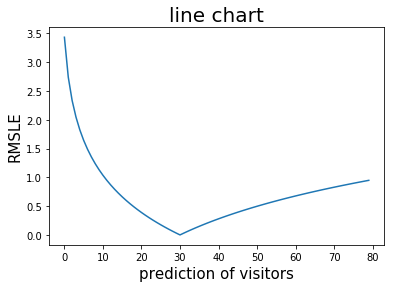

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# 推定人数
pred = np.arange(0,80,1)

# 30と固定
actual = 30
rmsle = []

# RMSLE評価値を算出
for i in range(len(pred)):
    rmsle.append(np.sqrt((np.log(pred[i] + 1) - np.log(actual + 1))**2))

# 描画
plt.plot(pred, rmsle)
plt.xlabel("prediction of visitors", fontsize=15)
plt.ylabel("RMSLE", fontsize=15)
plt.title("line chart", fontsize=20)
plt.show()

## --------EDA--------
与えられたデータを整理し、少なくとも以下のグラフや表を出力せよ。平均値だけではなく、最大値や中央値なども確認できると良い。

折れ線グラフ（横軸：日にち、縦軸：全てのAirREGI登録店の来店数の平均値）  
折れ線グラフ（横軸：日にち、縦軸：AirREGIで予約された席数の平均値）  
棒グラフ（横軸：曜日、縦軸：全てのAirREGI登録店の来店数の平均値）  
棒グラフ（横軸：holiday_flgが0か1か、縦軸：全てのAirREGI登録店の来店数の平均値）  
棒グラフ（横軸：土日祝かどうか、縦軸：全てのAirREGI登録店の来店数の平均値）  
棒グラフ（横軸：AirREGI登録店のジャンル、縦軸：登録店数）  
棒グラフ（横軸：AirREGI登録店の都道府県、縦軸：登録店数）  
表（Hot Pepper GourmetとAirREGIの登録店舗数。重複が何店舗かの確認）  
以下の関数を使いこなすことが重要である。  

今回は複数のcsvファイルにデータが別れているため、ある列を軸に結合するためにmergeを使用する。

pandas.DataFrame.merge — pandas 0.23.4 documentation

また、条件ごとの来店数の平均値などを求めるためには、groupbyを使用する。

pandas.DataFrame.groupby — pandas 0.23.4 documentation

In [19]:
import pandas as pd

air_reserve = pd.read_csv("/Users/tsuneo/kaggle/Recruit/air_reserve.csv")
air_store_info = pd.read_csv("/Users/tsuneo/kaggle/Recruit/air_store_info.csv")
air_visit_data = pd.read_csv("/Users/tsuneo/kaggle/Recruit/air_visit_data.csv")
date_info = pd.read_csv("/Users/tsuneo/kaggle/Recruit/date_info.csv")
hpg_reserve = pd.read_csv("/Users/tsuneo/kaggle/Recruit/hpg_reserve.csv")
hpg_store_info = pd.read_csv("/Users/tsuneo/kaggle/Recruit/hpg_store_info.csv")
sample_submission = pd.read_csv("/Users/tsuneo/kaggle/Recruit/sample_submission.csv")
store_id_relation = pd.read_csv("/Users/tsuneo/kaggle/Recruit/store_id_relation.csv")

In [20]:
print("air_reserve    :",air_reserve.shape)
print("air_store_info    :",air_store_info.shape)
print("air_visit_data    :",air_visit_data.shape)
print("date_info    :",date_info.shape)
print("hpg_reserve    :",hpg_reserve.shape)
print("hpg_store_info    :",hpg_store_info.shape)
print("sample_submission    :",sample_submission.shape)
print("store_id_relation    :",store_id_relation.shape)

air_reserve    : (92378, 4)
air_store_info    : (829, 5)
air_visit_data    : (252108, 3)
date_info    : (517, 3)
hpg_reserve    : (2000320, 4)
hpg_store_info    : (4690, 5)
sample_submission    : (32019, 2)
store_id_relation    : (150, 2)


## ファイルの属性を確認

In [21]:
# 「visit_datatime訪問予定の日時」、「reserve_datatime予約を登録した日時」、訪問予定人数
# air_store_id　：　the restaurant's id in the air system
# 92,378件
air_reserve.head()

,air_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,air_877f79706adbfb06,2016-01-01 19:00:00,2016-01-01 16:00:00,1
1,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,3
2,air_db4b38ebe7a7ceff,2016-01-01 19:00:00,2016-01-01 19:00:00,6
3,air_877f79706adbfb06,2016-01-01 20:00:00,2016-01-01 16:00:00,2
4,air_db80363d35f10926,2016-01-01 20:00:00,2016-01-01 01:00:00,5


In [22]:
# エアシステムの店舗情報（イタリアン・フレンチ・場所・緯度・経度）
# ８２９件
air_store_info.head()

,air_store_id,air_genre_name,air_area_name,latitude,longitude
0,air_0f0cdeee6c9bf3d7,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
1,air_7cc17a324ae5c7dc,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
2,air_fee8dcf4d619598e,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
3,air_a17f0778617c76e2,Italian/French,Hyōgo-ken Kōbe-shi Kumoidōri,34.695124,135.197852
4,air_83db5aff8f50478e,Italian/French,Tōkyō-to Minato-ku Shibakōen,35.658068,139.751599


## air_visit_data（来店実績）

In [23]:
# This file contains historical visit data for the air restaurants.
# 過去の来店実績データ　＠エア
# 252,108件
air_visit_data.head()

,air_store_id,visit_date,visitors
0,air_ba937bf13d40fb24,2016-01-13,25
1,air_ba937bf13d40fb24,2016-01-14,32
2,air_ba937bf13d40fb24,2016-01-15,29
3,air_ba937bf13d40fb24,2016-01-16,22
4,air_ba937bf13d40fb24,2016-01-18,6


In [24]:
# 来店実績ファイルに含まれている店舗数を確認する
air_visit_data["air_store_id"].unique().shape

(829,)

## カレンダー

In [25]:
# This file gives basic information about the calendar dates in the dataset.
# このデータセットのカレンダー
# 517件
date_info.head()

,calendar_date,day_of_week,holiday_flg
0,2016-01-01,Friday,1
1,2016-01-02,Saturday,1
2,2016-01-03,Sunday,1
3,2016-01-04,Monday,0
4,2016-01-05,Tuesday,0


In [26]:
# This file contains reservations made in the hpg system.
# ホットペッパーグルメのシステムによる予約
# 2,000,320件
hpg_reserve.head()

,hpg_store_id,visit_datetime,reserve_datetime,reserve_visitors
0,hpg_c63f6f42e088e50f,2016-01-01 11:00:00,2016-01-01 09:00:00,1
1,hpg_dac72789163a3f47,2016-01-01 13:00:00,2016-01-01 06:00:00,3
2,hpg_c8e24dcf51ca1eb5,2016-01-01 16:00:00,2016-01-01 14:00:00,2
3,hpg_24bb207e5fd49d4a,2016-01-01 17:00:00,2016-01-01 11:00:00,5
4,hpg_25291c542ebb3bc2,2016-01-01 17:00:00,2016-01-01 03:00:00,13


In [27]:
# This file contains information about select hpg restaurants. Column names and contents are self-explanatory.
# ホットペッパーグルメのシステムの店舗情報、カテゴリ・場所・緯度・経度
# 4,690件
hpg_store_info.head()

,hpg_store_id,hpg_genre_name,hpg_area_name,latitude,longitude
0,hpg_6622b62385aec8bf,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
1,hpg_e9e068dd49c5fa00,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
2,hpg_2976f7acb4b3a3bc,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
3,hpg_e51a522e098f024c,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221
4,hpg_e3d0e1519894f275,Japanese style,Tōkyō-to Setagaya-ku Taishidō,35.643675,139.668221


In [28]:
# This file shows a submission in the correct format, including the days for which you must forecast.
# このファイルは、あなたが予測しなければならない日数を含め、正しい形式で提出物を表示します。
# id - the id is formed by concatenating the air_store_id and visit_date with an underscore

# visitors- the number of visitors forecasted for the store and date combination
# 店舗と日付の組み合わせについて予測される訪問者の数
# 32,019件
sample_submission.head()

,id,visitors
0,air_00a91d42b08b08d9_2017-04-23,0
1,air_00a91d42b08b08d9_2017-04-24,0
2,air_00a91d42b08b08d9_2017-04-25,0
3,air_00a91d42b08b08d9_2017-04-26,0
4,air_00a91d42b08b08d9_2017-04-27,0


In [29]:
# This file allows you to join select restaurants that have both the air and hpg system.
# このファイルを使用すると、エアとhpgシステムの両方を持つ選択レストランに参加できます。
# 150件
store_id_relation.head()

,air_store_id,hpg_store_id
0,air_63b13c56b7201bd9,hpg_4bc649e72e2a239a
1,air_a24bf50c3e90d583,hpg_c34b496d0305a809
2,air_c7f78b4f3cba33ff,hpg_cd8ae0d9bbd58ff9
3,air_947eb2cae4f3e8f2,hpg_de24ea49dc25d6b8
4,air_965b2e0cf4119003,hpg_653238a84804d8e7


 ## サブミッションファイルの確認

In [30]:
#サブミッションファイルにairレジの店舗だけであるか確認。hpgシステム側の店舗idが無いことを確認
print("air始まり",sample_submission["id"].str.startswith("air").value_counts())
print("----")
print("hpg始まり",sample_submission["id"].str.startswith("hpg").value_counts())
print("----")
print(sample_submission.shape)

air始まり True    32019
Name: id, dtype: int64
----
hpg始まり False    32019
Name: id, dtype: int64
----
(32019, 2)


In [31]:
#サブミッションファイルのデータ型を確認する
sample_submission.dtypes

id          object
visitors     int64
dtype: object

In [32]:
# サブミッションファイルに含まれている店舗数を確認する
sample_submission["id"].str.split("_", expand=True)[1].unique().shape

(821,)

In [33]:
#サブミッションファイルのデータ型を確認する
sample_submission["id"].value_counts().shape

(32019,)

### 日付関連の確認

In [34]:
# 訪問実績ファイル（air_visit_data）の日付範囲を確認する
# 2016/1/1から2017/4/22までであることが分かる
print(air_visit_data["visit_date"].sort_values(ascending=True).head(1))
print('----')
print(air_visit_data["visit_date"].sort_values(ascending=True).tail(1))

189299    2016-01-01
Name: visit_date, dtype: object
----
252107    2017-04-22
Name: visit_date, dtype: object


In [35]:
# カレンダー日付の範囲を念の為確認
print(date_info["calendar_date"].sort_values(ascending=True).head(1))
print('----')
print(date_info["calendar_date"].sort_values(ascending=True).tail(1))

0    2016-01-01
Name: calendar_date, dtype: object
----
516    2017-05-31
Name: calendar_date, dtype: object


In [36]:
sample_submission["id"].str.split("_", expand=True)[2].unique()

array(['2017-04-23', '2017-04-24', '2017-04-25', '2017-04-26',
       '2017-04-27', '2017-04-28', '2017-04-29', '2017-04-30',
       '2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
       '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
       '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
       '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
       '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
       '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
       '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
       '2017-05-29', '2017-05-30', '2017-05-31'], dtype=object)

## グラフ描画

In [37]:
# 来訪実績ファイルには８２９店舗の情報があることが分かる
print(len(air_visit_data["air_store_id"].unique()))
print(air_visit_data["air_store_id"].value_counts().shape)

829
(829,)


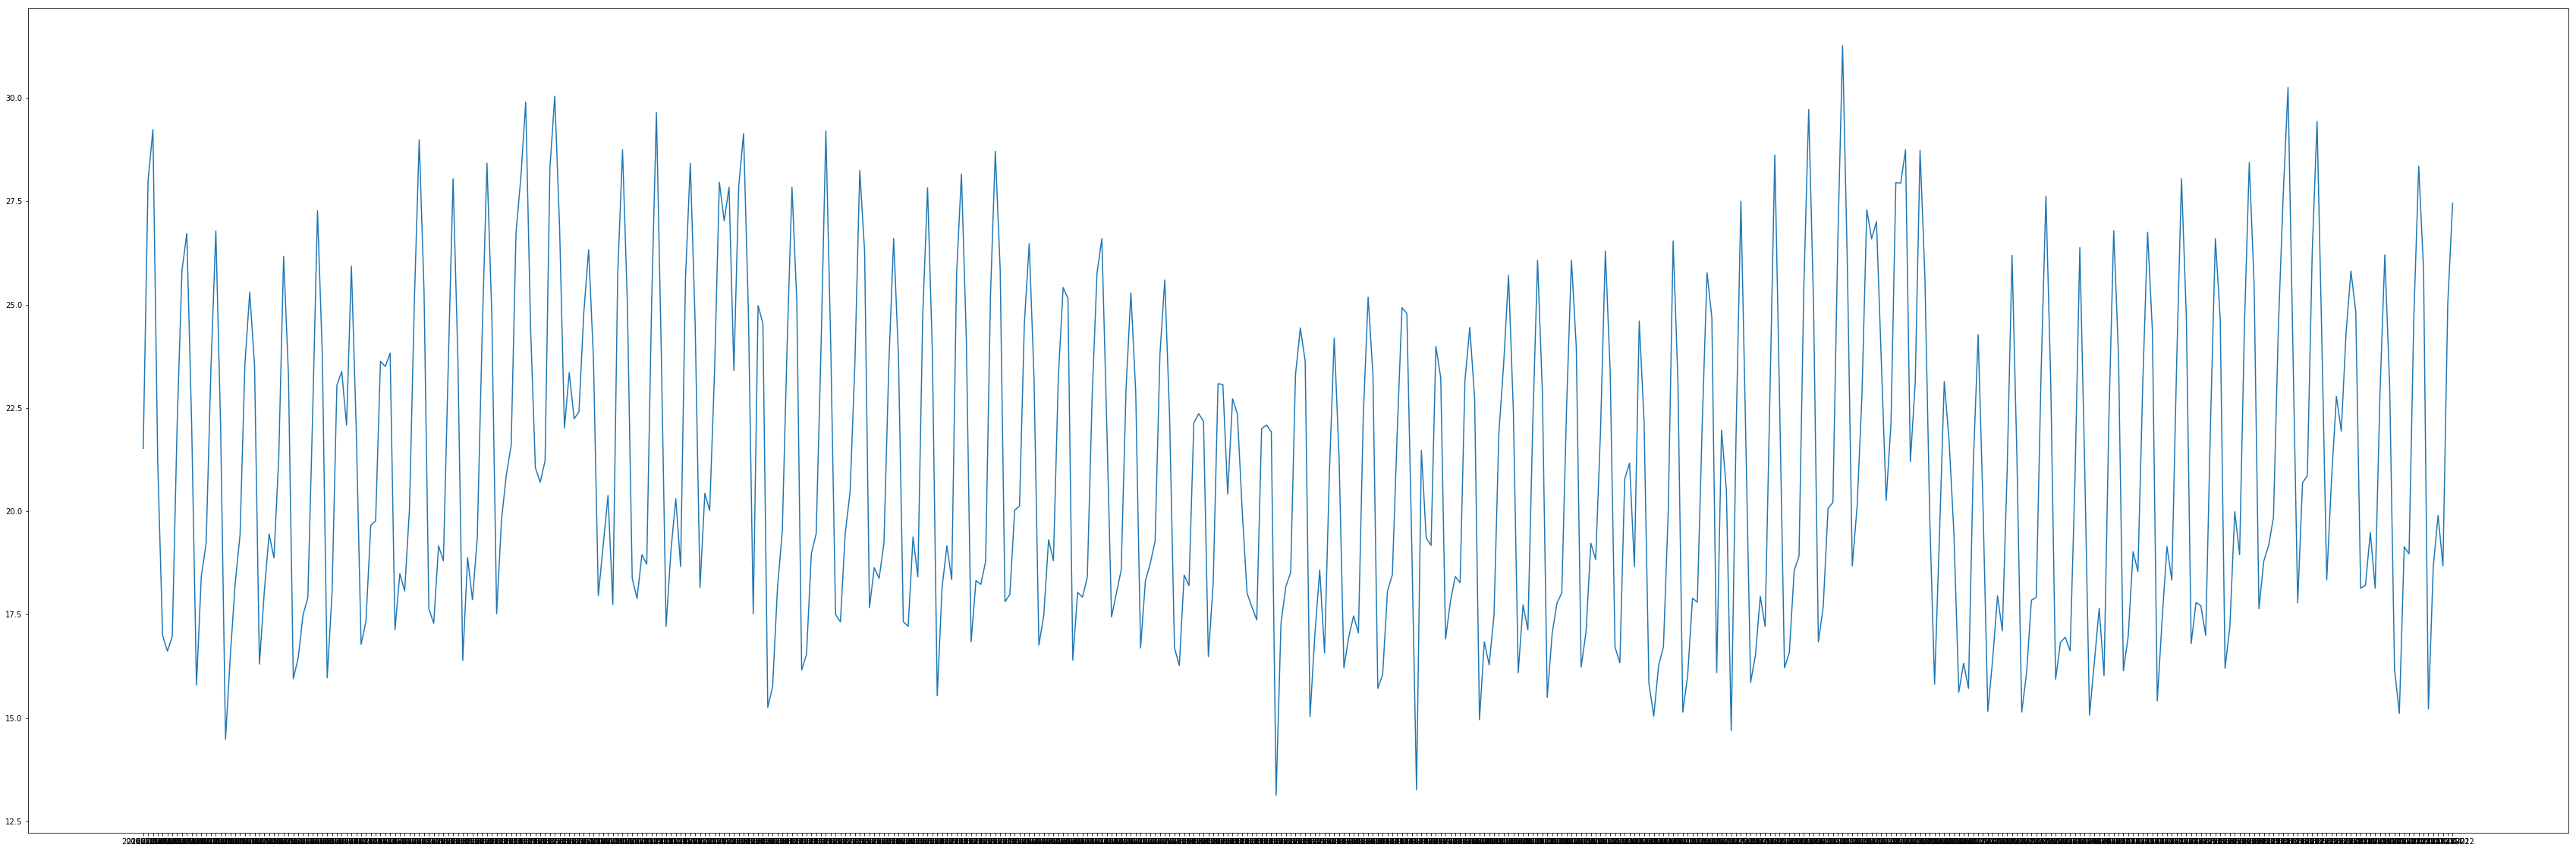

In [38]:
# 折れ線グラフ（横軸：日にち、縦軸：全てのAirREGI登録店の来店数の平均値）
air_visit_data.groupby(["visit_date"]).mean()
plt.figure(figsize=(60,20))
plt.plot(air_visit_data.groupby(["visit_date"]).mean())
plt.show()

In [39]:
# 予約情報（air_reserve）の店舗件数を確認
print(len(air_reserve["air_store_id"].unique()))
print(len(air_reserve["air_store_id"].value_counts()))

314
314


In [40]:
# 以下のEDAは一旦スキップ

#折れ線グラフ（横軸：日にち、縦軸：AirREGIで予約された席数の平均値）
#棒グラフ（横軸：曜日、縦軸：全てのAirREGI登録店の来店数の平均値）
#棒グラフ（横軸：holiday_flgが0か1か、縦軸：全てのAirREGI登録店の来店数の平均値）
#棒グラフ（横軸：土日祝かどうか、縦軸：全てのAirREGI登録店の来店数の平均値）
#棒グラフ（横軸：AirREGI登録店のジャンル、縦軸：登録店数）
#棒グラフ（横軸：AirREGI登録店の都道府県、縦軸：登録店数）
#表（Hot Pepper GourmetとAirREGIの登録店舗数。重複が何店舗かの確認）

# --------First Submission--------
コーディング  
単一モデルで学習して推定を行う。学習から推定までの一連の流れを確認することが目的であり、精度を上げるためのパラメータチューニングは不要である。

ここで最低1つSubmitを行うこと。

In [41]:
# モデルはSVR
from sklearn.svm import SVR
svr = SVR()


In [42]:
# 来店実績は829店舗
air = air_visit_data["air_store_id"].str.split("_",expand=True)[1].unique()
air.shape

(829,)

In [76]:
# サブミッションファイルは821店舗
sample = sample_submission["id"].str.split("_", expand=True)[1].unique()
sample.shape

(821,)

In [77]:
# 来店実績とサブミッションをidで内部結合したところ、８２１件であったので、
# サブミッションの821件が来店実績の829件に含まれることがわかった。
# 安心して、来店実績ファイル（air_visit_data）で学習しても良いことがわかった
pd.merge(air_pd, sample_pd, how='inner').shape

(821, 1)

### 日付をシーケンス（連番）化する（前処理）
学習させる際に、特徴量を「日付を１から採番した連番」と「来店人数」で行うことを考えた。

In [78]:
# seq列の追加
air_visit_data_seq = air_visit_data.assign(seq=0)
air_visit_data_seq.head()

# 連番リストを作成して、列をジョインさせる
seq_list = np.array(list(range(1,len(air_visit_data)+1)))
seq_list = pd.DataFrame(seq_list[:, np.newaxis])
air_visit_data_new = air_visit_data.join(seq_list)

# カラム名の変更
air_visit_data_new = air_visit_data_new.rename(columns={0:"seq" })
air_visit_data_new.head()

,air_store_id,visit_date,visitors,seq
0,air_ba937bf13d40fb24,2016-01-13,25,1
1,air_ba937bf13d40fb24,2016-01-14,32,2
2,air_ba937bf13d40fb24,2016-01-15,29,3
3,air_ba937bf13d40fb24,2016-01-16,22,4
4,air_ba937bf13d40fb24,2016-01-18,6,5


### fitさせる前の段階でタイムオーバー